In [45]:
from __future__ import print_function
import numpy as np
import pandas as pd

In [38]:
!pip install xlrd
print('xlrd installed')
import xlrd

xlrd installed
Solving environment: ...working... done

# All requested packages already installed.



In [177]:
df_can=pd.read_excel('https://dl.dropboxusercontent.com/s/g4vq60q2v2h4hvu/Canada.xlsx', 
                    sheet_name='Canada by Citizenship', 
                    skiprows=range(20), 
                    skipfooter=2)

In [153]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [154]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [155]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [156]:
df_can['Total']=df_can.sum(axis=1)

In [157]:
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [65]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [147]:
df_can.set_index('Country',inplace=True)

In [148]:
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [122]:
df_can.columns = list(map(str, df_can.columns))
years=list(map(str,range(1980,2014)))

Text(0, 0.5, 'Number of Immigrants')

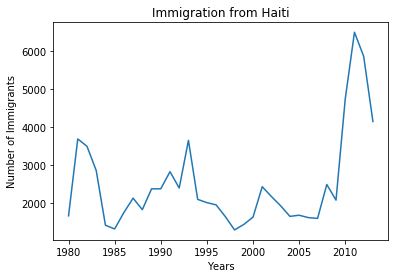

In [123]:
df_can.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

In [99]:
df_can=df_can.loc[['India','China'],years]
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


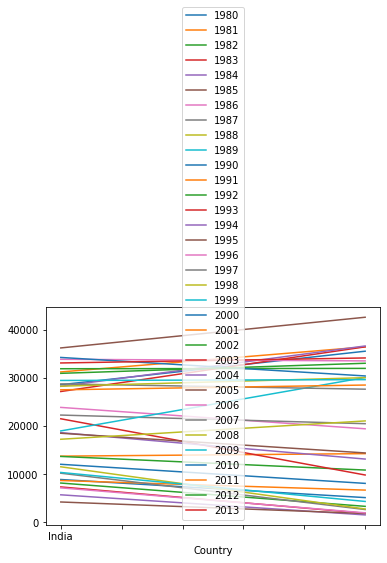

In [100]:
df_can.plot(kind='line')

In [101]:
df_can=df_can.transpose()
df_can.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


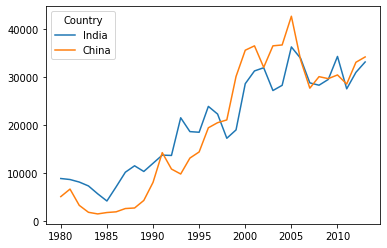

In [102]:
df_can.index=df_can.index.map(int)
df_can.plot(kind='line')

In [130]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True) 
df_top5=df_can.head(5)

In [108]:
df_top5 = df_top5[years].transpose() 

KeyError: "None of [Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',\n       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',\n       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',\n       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],\n      dtype='object', name='Country')] are in the [columns]"

In [111]:
print(df_top5)

Country India China
1980     8880  5123
1981     8670  6682
1982     8147  3308
1983     7338  1863
1984     5704  1527


In [168]:
years=list(map(str,range(1980,2014)))
df_can.sort_values(['Total'],ascending=False,axis=0,inplace=True)

In [170]:
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,Immigrants,Foreigners,India,935,Asia,5501,Southern Asia,902,Developing regions,8880,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
36,Immigrants,Foreigners,China,935,Asia,906,Eastern Asia,902,Developing regions,5123,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
183,Immigrants,Foreigners,United Kingdom of Great Britain and Northern I...,908,Europe,924,Northern Europe,901,Developed regions,22045,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
136,Immigrants,Foreigners,Philippines,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
130,Immigrants,Foreigners,Pakistan,935,Asia,5501,Southern Asia,902,Developing regions,978,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938


In [173]:
df_top5=df_can.head()
print(df_top5)

           Type    Coverage  \
79   Immigrants  Foreigners   
36   Immigrants  Foreigners   
183  Immigrants  Foreigners   
136  Immigrants  Foreigners   
130  Immigrants  Foreigners   

                                               Country  AREA Continent   REG  \
79                                               India   935      Asia  5501   
36                                               China   935      Asia   906   
183  United Kingdom of Great Britain and Northern I...   908    Europe   924   
136                                        Philippines   935      Asia   920   
130                                           Pakistan   935      Asia  5501   

                 Region  DEV             DevName   1980  ...   2005   2006  \
79        Southern Asia  902  Developing regions   8880  ...  36210  33848   
36         Eastern Asia  902  Developing regions   5123  ...  42584  33518   
183     Northern Europe  901   Developed regions  22045  ...   7258   7140   
136  South-Eastern A

In [174]:
df_top5=df_top5[years].transpose()

KeyError: "None of [Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',\n       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',\n       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',\n       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],\n      dtype='object')] are in the [columns]"